### Ingestion

In [ ]:
#Dont run this cell. Run cell below which already has the consoldated Dataframe

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


#Read the files and concat in one dataframe
df1=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2021-12-31-2022-01-31.csv')
df2=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-02-01-2022-02-28.csv')
df3=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-03-01-2022-03-31.csv')
df4=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-04-01-2022-04-30.csv')
df5=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-05-01-2022-05-31.csv')
df6=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-06-01-2022-06-30.csv')
df7=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-07-01-2022-07-31.csv')
df8=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-08-01-2022-08-31.csv')
df9=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-09-01-2022-09-30.csv')
df10=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-10-01-2022-10-31.csv')
df11=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-11-01-2022-11-30.csv')
df12=pd.read_csv('SR-26194620230109114154/SR-261946_Data request for customer segmentation(Dec)_2022-12-01-2022-12-31.csv')
df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12],axis=0)

df.sample(5)
df.to_csv('RFM_Consol_2022.csv')
df.shape

In [2]:
#Run this cell
df=pd.read_csv('RFM_Consol_2022.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
import warnings
warnings.filterwarnings("ignore")
df.sample(5)

<IPython.core.display.Javascript object>

,TCP#,Order Number,Order Date,Channel,Ticket,Gross Amount,Quantity,KYBM Category,Article Number
15580245,adabbc0cbd3783a749e16ab0d7ca6e00,SOA212006267330,2022-11-17,RS,1,19848.1,2.0,Smart Phones (OS Based),260611.0
12074329,b159d8ad8b097b9c3850568c14f533dc,ROA089004819407,2022-09-28,RS,0,-165690.0,-1.0,Mobile Computing,245232.0
15209936,6e630967c87cc81981bb4be59bef1979,SOA032006296537,2022-11-19,RS,1,14797.0,4.0,NON-KYBM,212249.0
10908375,e9a0b4e1f64474bc84ee0cccca3199e8,SOA062004127626,2022-08-28,RS,1,125243.1,6.0,NON-KYBM,229621.0
7586490,ff31e4f4538cbdd276009e4ca89b8220,SOA189002492352,2022-06-20,RS,1,8115.4,3.0,Washing Machines,211392.0


In [3]:
df.shape

(17475975, 9)

### Cleaning

In [4]:
df=df.rename(columns={'TCP#':'CustomerContactID'})
df=df.rename(columns={'Order Number':'OrderNo'})
df=df.rename(columns={'Order Date':'orderDate'})
df=df.rename(columns={'Channel':'SalesChannelCode'})
df=df.rename(columns={'Ticket':'Ticket'})
df=df.rename(columns={'Gross Amount':'Gross'})
df=df.rename(columns={'Quantity':'Quantity'})
df=df.rename(columns={'KYBM Category':'Category'})
df=df.rename(columns={'Article Number':'SKU'})

#data transformation- 
#drop Sales channel, Ticket. 
df.drop(columns=['SalesChannelCode','Ticket'],inplace=True)

#Clean up Quantity and keep rows only where Quantity>0
df=df.replace(',','',regex=True)
df['Quantity']=df['Quantity'].astype(str).astype(str).astype(float).astype(float)
df['Gross']=df['Gross'].astype(str).astype(str).astype(float).astype(float)
df=df[df['Quantity']>0]

#drop Quantity
df.drop(columns='Quantity',inplace=True)

#Convert orderDate to datetime format and find the difference from the max date value of the dataset
df['orderDate']=pd.to_datetime(df['orderDate'])
df['Diff']=pd.Timestamp(max(df['orderDate']))-df['orderDate']

#convert the Diff values to integer
df['Diff']=df['Diff'].dt.days

#retain values less than a year
df=df[df['Diff']<365]

df.sample(10)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,CustomerContactID,OrderNo,orderDate,Gross,Category,SKU,Diff
1145868,f3e667705a6bbfb00a334a19e3bb074d,SOA037000161764,2022-01-14,3149.00,SOUND-KYBM,214741.0,351
16667209,7500b472812f6e7b57d4142023bd150d,SOA058007061104,2022-12-22,50372.50,NON-KYBM,261113.0,9
13837204,9c8720fbec617674702b097b510a8b7d,SOA218004977596,2022-10-03,133123.71,NON-KYBM,226239.0,89
3354330,NaN,9240012580,2022-04-18,-11075.04,NON-KYBM,163447.0,257
13175345,53aa3eb83096f30455de28f82cfef7af,SOA256005903082,2022-10-31,44889.01,NON-KYBM,169175.0,61
5535587,969b029d80a95d423c7fa65896e88863,SOA045001828316,2022-05-20,6699.00,SOUND-KYBM,247288.0,225
8100989,490f74461d9651137f514e1e279d094f,SOA180002988330,2022-07-14,17909.00,Smart Phones (OS Based),246853.0,170
3745356,4e1808f62cb48a0be80c2faf8a361373,SOA120001238703,2022-04-24,61751.00,SOUND-KYBM,239033.0,251
13592132,8464888394,U3fW0TYjF,2022-10-05,7490.00,TV LCD,242597.0,87
14607524,fc3f74fbcbc9cda239f07cb2053aebac,SOA039005216191,2022-10-12,2478.00,NON-KYBM,257672.0,80


### Recency calculation

Stats of Rec:                Diff
count  6.231728e+06
mean   1.568038e+02
std    9.995564e+01
min    0.000000e+00
25%    7.100000e+01
50%    1.460000e+02
75%    2.370000e+02
max    3.640000e+02


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

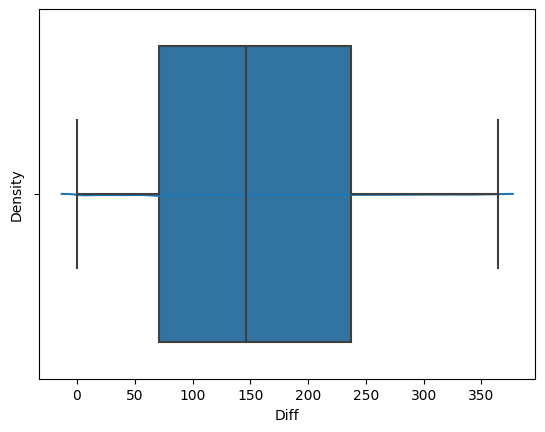

In [5]:
#Create new dataframe which shows each customer id once along with the last date of purchase for them
df_rec=df.groupby('CustomerContactID').min('Diff').reset_index()
#remove 1st row
df_rec=df_rec.iloc[1:]
df_rec.drop(columns=['Gross','SKU'],inplace=True)

#output- show stats of the Days column
print('Stats of Rec:',df_rec.describe())

#Distribution on a graph
sns.distplot(df_rec['Diff'],bins=50)
sns.boxplot(x='Diff',data=df_rec)

stats=df_rec.describe()
stats=stats.reset_index()
stats.rename(columns={'index':'Measure'},inplace=True)
q1=stats[stats['Measure']=='25%'].to_numpy()
q2=stats[stats['Measure']=='50%'].to_numpy()
q3=stats[stats['Measure']=='75%'].to_numpy()

Q1_rec=q1[0][1]
Q2_rec=q2[0][1]
Q3_rec=q3[0][1]

In [6]:
df_rec.sample(10)

,CustomerContactID,Diff
4918131,c3a099a965b1a0288fd4988c70a936bf,63
4383444,ab0db28cee35cd4a8312e37c26a2821e,78
2703527,737b3accf10a3e0fde7528cb2f34c406,147
4460198,ae95753cf5b675a1b316acb63884269c,138
1269964,33b4ad50ed89b78db78d6febf6607299,232
147201,0494214932,213
2362671,6540fd7a4faa619d43a527446c6db00e,184
318374,0980865540,159
484416,1058835201,151
3187348,851cc9c68875074851ad953ab8faa197,225


In [7]:
df_rec.shape

(6231728, 2)

### SKU purchased in the most recent purchase

In [8]:
df_SKU=df.groupby('CustomerContactID').max('SKU').reset_index()
df_SKU.drop(columns=['Diff','Gross'],inplace=True)

In [9]:
df_SKU.sample(5)

,CustomerContactID,SKU
4685954,b8f54fa6e74297aeef16b84ce1988efa,247660.0
832687,1fe3a6b1d6e45066a510ed0de2bd11d6,219044.0
5545929,e0702bebf8082caf9239b9aa91cbd20c,205693.0
5850471,ee6cef0ef3bfe77c55284c982f9a85af,231572.0
6216528,ff4b4e584a74ede43921a959ef01c02a,242728.0


In [10]:
df_SKU.shape

(6231729, 2)

### Frequency

Stats of Freq:
            OrderNo
count  6.231729e+06
mean   2.474140e+00
std    3.674178e+00
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    3.000000e+00
max    3.636000e+03
            
Distribution of Order#
1      2823259
2      1585686
3       682308
4       420382
5       237954
        ...   
399          1
567          1
187          1
471          1
412          1
Name: OrderNo, Length: 277, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

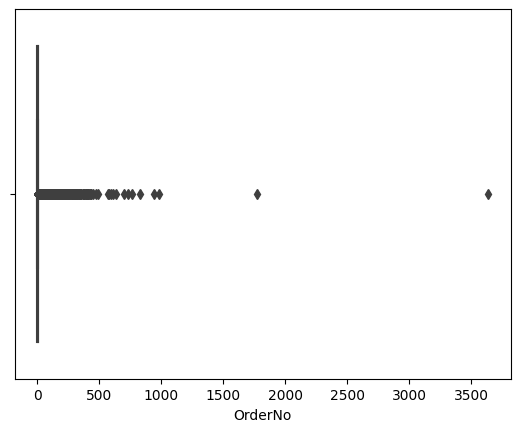

In [11]:
#Without removing outliers

#Create new dataframe which shows each customer id and how many times they have purchased in the last 12 months
df_freq=df.groupby('CustomerContactID').count().reset_index()
df_freq.drop(columns=['orderDate','Diff','Gross'],inplace=True)
df_freq.drop(columns=['SKU','Category'],inplace=True)

#output- show stats of the Days column
print('Stats of Freq:')
print(df_freq.describe())
print('            ')      
print('Distribution of Order#')
print(df_freq['OrderNo'].value_counts())

#Distribution on a graph
plt.plot(df_freq['OrderNo'].value_counts())

sns.boxplot(x='OrderNo',data=df_freq)

#Get the information of the quartile in variables to be used later for bucketing
stats=df_freq.describe()
stats=stats.reset_index()
stats.rename(columns={'index':'Measure'},inplace=True)
q1=stats[stats['Measure']=='25%'].to_numpy()
q2=stats[stats['Measure']=='50%'].to_numpy()
q3=stats[stats['Measure']=='75%'].to_numpy()

Q1_freq=q1[0][1]
Q2_freq=q2[0][1]
Q3_freq=q3[0][1]

Stats of Freq:
            OrderNo
count  5.749589e+06
mean   1.898023e+00
std    1.124387e+00
min    1.000000e+00
25%    1.000000e+00
50%    2.000000e+00
75%    2.000000e+00
max    5.000000e+00
            
Distribution of Order#
1    2823259
2    1585686
3     682308
4     420382
5     237954
Name: OrderNo, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

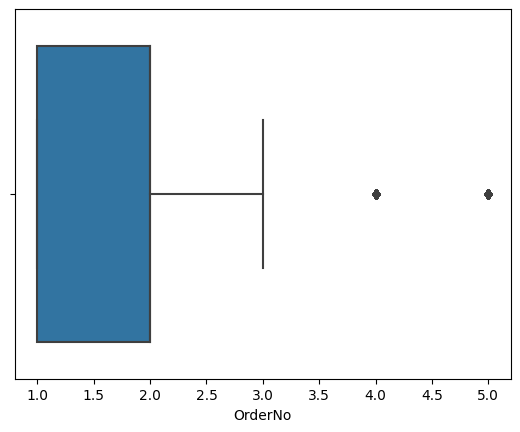

In [12]:
#Calculating the Upper limit and lower limit for outlier detection

IQR_freq=Q3_freq-Q1_freq
Up_freq=Q3_freq+(1.5*IQR_freq)
Lo_freq=Q1_freq-(1.5*IQR_freq)


#After removing outliers
df_freq=df_freq[(df_freq['OrderNo']<Up_freq) & (df_freq['OrderNo']>Lo_freq)]

#output- show stats of the Days column
print('Stats of Freq:')
print(df_freq.describe())
print('            ')      
print('Distribution of Order#')
print(df_freq['OrderNo'].value_counts())

#Distribution on a graph
plt.plot(df_freq['OrderNo'].value_counts())

sns.boxplot(x='OrderNo',data=df_freq)

#Get the information of the quartile in variables to be used later for bucketing
stats=df_freq.describe()
stats=stats.reset_index()
stats.rename(columns={'index':'Measure'},inplace=True)
q1=stats[stats['Measure']=='25%'].to_numpy()
q2=stats[stats['Measure']=='50%'].to_numpy()
q3=stats[stats['Measure']=='75%'].to_numpy()

Q1_freq=q1[0][1]
Q2_freq=q2[0][1]
Q3_freq=q3[0][1]

In [13]:
df_freq.shape

(5749589, 2)

### Monetary

Stats of Revenue:
              Gross
count  6.231728e+06
mean   7.342319e+04
std    2.746105e+05
min   -1.827000e+04
25%    2.180000e+03
50%    1.706400e+04
75%    6.767700e+04
max    1.225857e+08


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

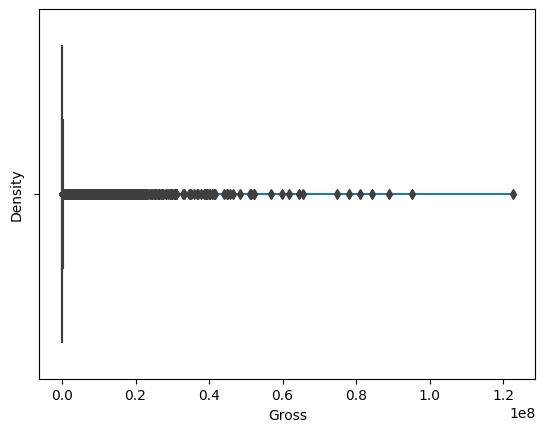

In [14]:
#Without removing outlier

df_rev=df.groupby('CustomerContactID').sum().reset_index()
df_rev=df_rev.iloc[1:]
df_rev['Gross']=df_rev['Gross'].astype(str).astype(float)
df_rev.drop(columns=['Diff','SKU'],inplace=True)


print('Stats of Revenue:')
print(df_rev.describe())
sns.distplot(df_rev['Gross'],bins=20,kde=True)
sns.boxplot(x='Gross',data=df_rev)

stats=df.describe()
stats=stats.reset_index()
stats.rename(columns={'index':'Measure'},inplace=True)
q1=stats[stats['Measure']=='25%'].to_numpy()
q2=stats[stats['Measure']=='50%'].to_numpy()
q3=stats[stats['Measure']=='75%'].to_numpy()

Q1_mon=q1[0][1]
Q2_mon=q2[0][1]
Q3_mon=q3[0][1]

Stats of Revenue:
              Gross
count  5.097445e+06
mean   2.081302e+04
std    2.542321e+04
min   -1.827000e+04
25%    1.699000e+03
50%    8.368200e+03
75%    3.258000e+04
max    1.024914e+05


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

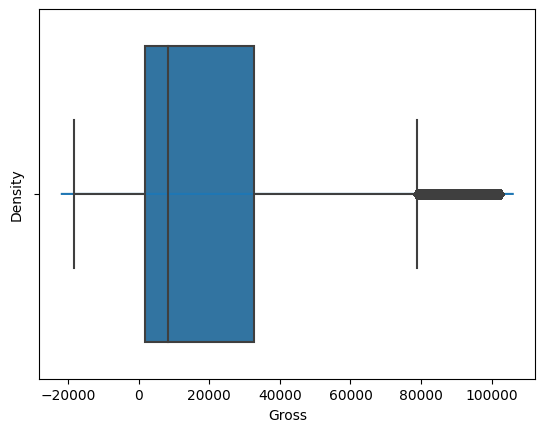

In [15]:
IQR_mon=Q3_mon-Q1_mon
Up_mon=Q3_mon+(1.5*IQR_mon)
Lo_mon=Q1_mon-(1.5*IQR_mon)

#After removing outlier
df_rev=df_rev[(df_rev['Gross']<Up_mon) & (df_rev['Gross']>Lo_mon)]


print('Stats of Revenue:')
print(df_rev.describe())
sns.distplot(df_rev['Gross'],bins=20,kde=True)
sns.boxplot(x='Gross',data=df_rev)

stats=df.describe()
stats=stats.reset_index()
stats.rename(columns={'index':'Measure'},inplace=True)
q1=stats[stats['Measure']=='25%'].to_numpy()
q2=stats[stats['Measure']=='50%'].to_numpy()
q3=stats[stats['Measure']=='75%'].to_numpy()

Q1_mon=q1[0][1]
Q2_mon=q2[0][1]
Q3_mon=q3[0][1]

In [16]:
df_rev.shape

(5097445, 2)

### RFM dataframe

In [17]:
#create a common dataframe for all customers to be scored
df_rfm=((df_rec.merge(df_rev,on='CustomerContactID').merge(df_freq,on='CustomerContactID')).merge(df_SKU,on='CustomerContactID'))

In [18]:
df_rfm.sample(5)

,CustomerContactID,Diff,Gross,OrderNo,SKU
2733392,8c40ae87376d292c0a784cc719d1bda0,355,6688.0,3,240368.0
2831414,90a1eeeec1966bf4e1fced87537f4940,363,521.0,2,220331.0
1680073,5a5094fa83175c0fe68165aa56050ca8,265,2495.0,1,209487.0
2850384,9148156946,57,4890.0,1,227708.0
4152825,cd88950c3f756c815d5f25bc159ab749,86,2976.0,2,253703.0


In [19]:
df_rfm.shape

(5011440, 5)

### Dataloss check

In [20]:
((df['CustomerContactID'].nunique()-df_rfm['CustomerContactID'].nunique())/df['CustomerContactID'].nunique())*100

19.581868852127556

### Ranking

In [21]:
#recency rank
rec=[]
for i in df_rfm['Diff']:
    if(i<=Q1_rec):
        rec.append(1)
    elif(i>Q1_rec and i<=Q2_rec):
        rec.append(2)
    elif(i>Q2_rec and i<=Q3_rec):
        rec.append(3)
    elif(i>Q3_rec):
        rec.append(4)
    else:
        freq.append(0)
df_rfm['rec']=rec

#frequency rank
freq=[]
for i in df_rfm['OrderNo']:
    if(i<=1):
        freq.append(4)
    elif(i>1 and i<=2):
        freq.append(3)
    elif(i>2 and i<=3):
        freq.append(2)
    elif(i>3):
        freq.append(1)
    else:
        freq.append(0)
df_rfm['freq']=freq

#monetary rank
mon=[]
for i in df_rfm['Gross']:
    if(i<=Q1_mon):
        mon.append(4)
    elif(i>Q1_mon and i<=Q2_mon):
        mon.append(3)
    elif(i>Q2_mon and i<=Q3_mon):
        mon.append(2)
    elif(i>Q3_mon):
        mon.append(1)
    else:
        mon.append(0)
df_rfm['mon']=mon


#create a dataframe dormant which has ids of customers whose recency rank is >3(i.e more than 90 days)

dormant=df_rfm[df_rfm['rec']>1]

#create an exclusion dataframe for dormant where freq and monetary ranking is less than 3(i.e not completely lost)
dormant_excl=dormant[dormant['freq']<2].merge(dormant[dormant['mon']<=2 ])

#Output
df_rfm
df_rfm.to_csv('Ranked_users.csv')

In [22]:
df_rfm['rec']=df_rfm['rec'].astype(str)
df_rfm['freq']=df_rfm['freq'].astype(str)
df_rfm['mon']=df_rfm['mon'].astype(str)
df_rfm['Rank']=df_rfm['rec']+df_rfm['freq']+df_rfm['mon']

df_rfm['rec']=df_rfm['rec'].astype(str)
df_rfm['freq']=df_rfm['freq'].astype(str)
df_rfm['mon']=df_rfm['mon'].astype(str)
df_rfm['Rank']=df_rfm['rec']+df_rfm['freq']+df_rfm['mon']

In [23]:
df_rfm.sample(5)

,CustomerContactID,Diff,Gross,OrderNo,SKU,rec,freq,mon,Rank
4282137,d5171e65f5991d3cc22bfc93778183d0,324,40332.0,2,247232.0,4,3,2,432
2839322,9106341664,160,599.0,1,250330.0,3,4,4,344
3432536,a335b48e99b39d06f18130bba6883752,301,51897.0,2,248586.0,4,3,1,431
1738236,5db8bef8ee4445d90cd4b12f8110424b,6,31039.0,2,257259.0,1,3,2,132
4180159,cf20bc3790daab9878ae25b466169002,156,49938.6,2,246071.0,3,3,1,331


In [24]:
df_rfm.shape

(5011440, 9)

In [25]:
df_rfm['Rank'].nunique()

64

In [26]:
#df_rfm_final=df_rfm[['CustomerContactID','Rank']]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot: xlabel='Rank', ylabel='Count'>

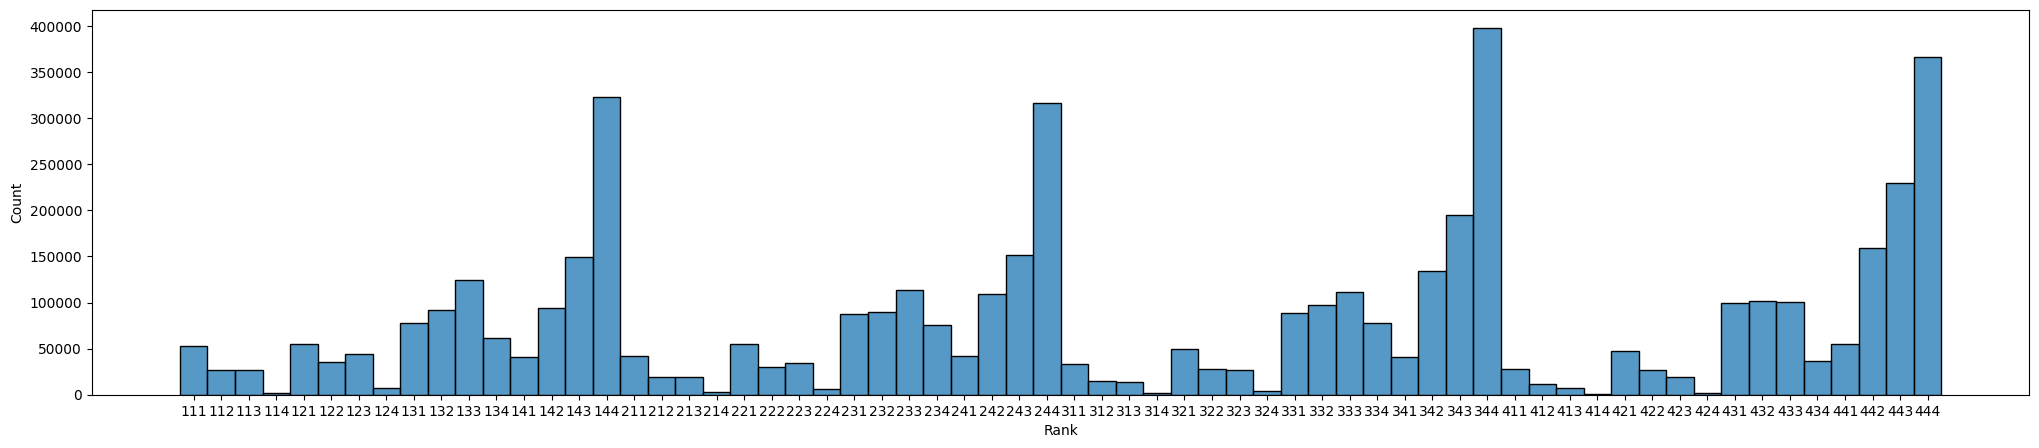

In [27]:
df_rfm.sort_values(by=['Rank'],inplace=True)
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(5)
sns.histplot(df_rfm['Rank'])

### Creating clusters

#### Finding the appropriate number of clusters basis kmean clustering

In [28]:
df_rfm_init=df_rfm[['Diff','Gross','OrderNo']]

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans=KMeans(n_clusters=4,max_iter=10)
kmeans.fit(df_rfm_init)

KMeans(max_iter=10, n_clusters=4)

In [31]:
kmeans.inertia_

170005095928659.2

In [32]:
elbow=[]
cluster_range=[2,4,6,8,10]
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,max_iter=10)
    kmeans.fit(df_rfm_init)
    elbow.append(kmeans.inertia_)

<IPython.core.display.Javascript object>

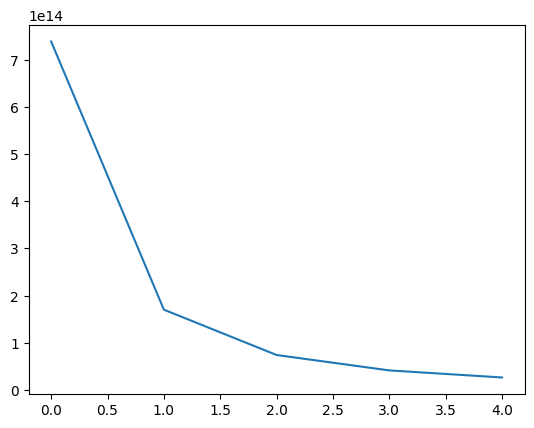

In [33]:
plt.plot(elbow)

Inertia measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

### Finding the Silhouette score

In [34]:
#What is label- this is the rank given to each point in the cluster
len(kmeans.labels_)==df_rfm_init.count()

Diff       True
Gross      True
OrderNo    True
dtype: bool

In [35]:
kmeans.labels_[:10]

array([9, 9, 0, 2, 9, 7, 7, 2, 2, 0])

In [36]:
from sklearn.metrics import silhouette_score

In [42]:
df_rfm_init_sample=df_rfm_init.sample(frac=.02)

In [43]:
cluster_range=[2,4,6,8,10]
silhouette_avg=[]
for i in cluster_range:
    kmeans=KMeans(n_clusters=i,max_iter=10)
    kmeans.fit(df_rfm_init_sample)
    cluster_labels=kmeans.labels_
    
    #silhouette score: average of cluster labels for cluster count i
    silhouette_avg=silhouette_score(df_rfm_init_sample, cluster_labels)
    print('Silhouette score for cluster{0} is {1}'.format(i,silhouette_avg))

Silhouette score for cluster2 is 0.7290429366018393
Silhouette score for cluster4 is 0.68347279794476
Silhouette score for cluster6 is 0.6625609333683996
Silhouette score for cluster8 is 0.6384984566230064
Silhouette score for cluster10 is 0.6386811621088959


# Ranking for the top 30 percentile customers

In [ ]:
df_perc=pd.read_csv('top_30_pct_repeat_customers_jan_feb_mar_2023.csv')

In [ ]:
df_com=df_rfm.merge(df_perc,on='CustomerContactID')

In [ ]:
df_com.shape,df_perc.shape,df_rfm.shape

In [ ]:
df_com.sample(5)

In [ ]:
df_perc.head(5)

In [ ]:
df_perc[df_perc['CustomerContactID']=='8967be861bc1edb99b93509141b45a20']

In [ ]:
df_com.to_csv('RFM_Top30.csv')

# Next Steps:
1.	Test RFM model on July for repeat buyer % for the 4 Recency buckets.
2.	Pick samples for different recency buckets for separate models.
3.	Build behavior variables – only those institutively correct and regress to build a Log. Reg. Model.
    a.	Create RFM based variables and test against dep var on scatter plots. (bivariate).
    b.	Ad campaign variables along with seasonal variables.
    c.	Delivery Zone (N/W/S).


Part 1: Create 4 recency buckets. See how many of these customers have purchased in July

In [ ]:
#Create seperate dataframes where each dataframe corresponds to each of the rank on recency(1,2,3,4)
b1=df_rfm[df_rfm['rec']==1].drop(columns=['Diff','Gross','OrderNo'])
b2=df_rfm[df_rfm['rec']==2].drop(columns=['Diff','Gross','OrderNo'])
b3=df_rfm[df_rfm['rec']==3].drop(columns=['Diff','Gross','OrderNo'])
b4=df_rfm[df_rfm['rec']==4].drop(columns=['Diff','Gross','OrderNo'])

#Create a dataframe for July 22 data
df_jul=pd.read_csv('SR-234242/jul22-sep22.csv')
df_jul['orderDate']=pd.to_datetime(df_jul['orderDate'])
df_jul['month']=df_jul['orderDate'].dt.month
df_jul=df_jul[df_jul['month']==8]

#Find out IDs who are common between rank 1 customers and July 22 customers
df_b1_jul=b1.merge(df_jul,on=['CustomerContactID'])
print((df_b1_jul['CustomerContactID'].nunique()/b1['CustomerContactID'].nunique())*100,'% of rank 1 customers buy in Jul 22')
df_b1_jul=df_b1_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are in b1 but not in Jul 22
df_b1_not_jul=b1.merge(df_jul,on=['CustomerContactID'],
                   how='left', indicator=True)
df_b1_not_jul=df_b1_not_jul[df_b1_not_jul['_merge']=='left_only']
df_b1_not_jul=df_b1_not_jul[['CustomerContactID','rec','freq','mon']]



#Find out IDs who are common between rank 2 customers and July 22 customers
df_b2_jul=b2.merge(df_jul,on=['CustomerContactID'])
print((df_b2_jul['CustomerContactID'].nunique()/b2['CustomerContactID'].nunique())*100,'% of rank 2 customers buy in Jul 22')
df_b2_jul=df_b1_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are in b2 but not in Jul 22
df_b2_not_jul=b2.merge(df_jul,on=['CustomerContactID'],
                   how='left', indicator=True)
df_b2_not_jul=df_b2_not_jul[df_b2_not_jul['_merge']=='left_only']
df_b2_not_jul=df_b2_not_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are common between rank 3 customers and July 22 customers
df_b3_jul=b3.merge(df_jul,on=['CustomerContactID'])
print((df_b3_jul['CustomerContactID'].nunique()/b3['CustomerContactID'].nunique())*100,'% of rank 3 customers buy in Jul 22')
df_b3_jul=df_b1_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are in b1 but not in Jul 22
df_b3_not_jul=b3.merge(df_jul,on=['CustomerContactID'],
                   how='left', indicator=True)
df_b3_not_jul=df_b3_not_jul[df_b3_not_jul['_merge']=='left_only']
df_b3_not_jul=df_b3_not_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are common between rank 4 customers and July 22 customers
df_b4_jul=b4.merge(df_jul,on=['CustomerContactID'])
print((df_b4_jul['CustomerContactID'].nunique()/b4['CustomerContactID'].nunique())*100,'% of rank 4 customers buy in Jul 22')
df_b4_jul=df_b1_jul[['CustomerContactID','rec','freq','mon']]

#Find out IDs who are in b1 but not in Jul 22
df_b4_not_jul=b4.merge(df_jul,on=['CustomerContactID'],
                   how='left', indicator=True)
df_b4_not_jul=df_b4_not_jul[df_b4_not_jul['_merge']=='left_only']
df_b4_not_jul=df_b4_not_jul[['CustomerContactID','rec','freq','mon']]

In [ ]:
b1.nunique()

Create an init dataframe which contains independent factors from original data set, total purchase amount, purchase count and last date of purchase per customer ID. 

In [ ]:
#create a dataframe for last 12 months which contains labelled values of customer IDs
df_init_1=pd.concat([df1,df2,df3,df4],axis=0)

#Clean up Quantity and keep rows only where Quantity>0
df_init_1=df_init_1.replace(',','',regex=True)
df_init_1['Quantity']=df_init_1['Quantity'].astype(str).astype(str).astype(float).astype(float)
df_init_1['Gross']=df_init_1['Gross'].astype(str).astype(str).astype(float).astype(float)
df_init_1=df_init_1[df_init_1['Quantity']>0]

df_init_date=df_init_1.groupby('CustomerContactID').last().reset_index()
df_init_date=df_init_date[['CustomerContactID','orderDate','SalesChannelCode','Quantity','Ticket']]

df_init_freq=df_init_1.groupby('CustomerContactID').count().reset_index()
df_init_freq=df_init_freq[['CustomerContactID','OrderNo']]

df_init_mon=df_init_1.groupby('CustomerContactID').sum().reset_index()
df_init_mon=df_init_mon[['CustomerContactID','Gross']]

df_init_final=df_init_freq.merge(df_init_date.merge(df_init_mon,on='CustomerContactID'),on='CustomerContactID')
df_init_final=df_init_final.iloc[1:]



Create a dataframe which contains customer IDs from bucket 1 who buy in July and who do not buy in July

In [ ]:
#Dataframe for buyers
df_b1_jul_purchased=df_init_final.merge(df_b1_jul,on='CustomerContactID')

df_b1_jul_purchased['Purchase']=1
df_b1_jul_purchased

#Dataframe for non buyers

df_b1_jul_not_purchased=df_init_final.merge(df_b1_not_jul,on='CustomerContactID')
df_b1_jul_not_purchased['Purchase']=0
#df_b1_jul_not_purchased=df_b1_jul_not_purchased.sample(30000)

#Merge the 2 dataframes
df_b1_jul_log=pd.concat([df_b1_jul_purchased,df_b1_jul_not_purchased],axis=0)

In [ ]:
df_b1_jul_log['Purchase'].value_counts()

In [ ]:
df_b1_jul_not_purchased=df_b1_jul_not_purchased.sample(30000)

In [ ]:
df_b1_jul_log

In [ ]:
print('Distribution of Freq rank in Recency 1 bucket')
print(df_b1_jul['freq'].value_counts())
print('\n')
print('Distribution of Monetary rank in Recency 1 bucket')
print(df_b1_jul['mon'].value_counts())
print('\n')

print('Distribution of Freq rank in Recency 2 bucket')
print(df_b2_jul['freq'].value_counts())
print('\n')
print('Distribution of Monetary rank in Recency 1 bucket')
print(df_b2_jul['mon'].value_counts())
print('\n')

print('Distribution of Freq rank in Recency 3 bucket')
print(df_b3_jul['freq'].value_counts())
print('\n')
print('Distribution of Monetary rank in Recency 1 bucket')
print(df_b3_jul['mon'].value_counts())
print('\n')

print('Distribution of Freq rank in Recency 4 bucket')
print(df_b4_jul['freq'].value_counts())
print('\n')
print('Distribution of Monetary rank in Recency 1 bucket')
print(df_b4_jul['mon'].value_counts())
print('\n')

In [ ]:
df_b1_jul

# Monthly cross tabbed data

Find out what is the return propensity for a month from all previous months

In [ ]:
#Read the files and concat in one dataframe
df1=pd.read_csv('SR-234242/jul21-sep21.csv')
df2=pd.read_csv('SR-234242/oct21-dec21.csv')
df3=pd.read_csv('SR-234242/jan22-mar22.csv')
df4=pd.read_csv('SR-234242/apr22-jun22.csv')
df5=pd.read_csv('SR-234242/jul22-sep22.csv')
df=pd.concat([df1,df2,df3,df4,df5],axis=0)

import warnings
warnings.filterwarnings("ignore")

#data transformation- 
#drop Sales channel, Ticket. 
#df.drop(columns=['SalesChannelCode','Ticket'],inplace=True)

#Clean up Quantity and keep rows only where Quantity>0
df=df.replace(',','',regex=True)
df['Quantity']=df['Quantity'].astype(str).astype(str).astype(float).astype(float)
df['Gross']=df['Gross'].astype(str).astype(str).astype(float).astype(float)
df=df[df['Quantity']>0]
#drop Quantity
#df.drop(columns='Quantity',inplace=True)
#Convert orderDate to datetime format and find the difference from the max date value of the dataset
df['orderDate']=pd.to_datetime(df['orderDate'])


#Create a new column year_new to get an integer value for each month, year combination
df['year']=df['orderDate'].dt.year
df['month']=df['orderDate'].dt.month
df['year_new']=1
df.loc[df['year']==2021,'year']=0
df.loc[df['year']==2022,'year']=12
df['year_new']=df['month']+df['year']

#This loop gives repeat purchasers in the same month 
#and repeat purchasers from the month originating from all months from month to July21
 
for i in range(7,22):
    df_con=df[df['year_new']==i]
    df_con['Duplicated']=df_con['CustomerContactID'].duplicated()
    df_con_duplicate=df_con[df_con['Duplicated']==True]
    df_con_duplicate=df_con_duplicate.dropna()
    #repeat purchasers in the same month 
    print(i,df_con_duplicate['CustomerContactID'].nunique())
    print('___________________________________________')
    common_count_ar=[]
    for j in range(7,i):
        common_count_ar=[]
        df_lf=df[df['year_new']==j]
        common=df_con.merge(df_lf,on='CustomerContactID')
        common_count=common['CustomerContactID'].nunique()
        common_count_ar.append(common_count)
        # repeat purchasers from the month originating from all months from month to July21
        print(j,common_count_ar)
print('___________________________________________')

In [ ]:
df4=pd.read_csv('SR-234242/apr22-jun22.csv')

In [ ]:
df=df4

In [ ]:
df.drop(columns=['SalesChannelCode','Ticket'],inplace=True)

#Clean up Quantity and keep rows only where Quantity>0
df=df.replace(',','',regex=True)
df['Quantity']=df['Quantity'].astype(str).astype(str).astype(float).astype(float)
df['Gross']=df['Gross'].astype(str).astype(str).astype(float).astype(float)
df=df[df['Quantity']>0]
#drop Quantity
df.drop(columns='Quantity',inplace=True)
#Convert orderDate to datetime format and find the difference from the max date value of the dataset
df['orderDate']=pd.to_datetime(df['orderDate'])
df['Diff']=pd.Timestamp(max(df['orderDate']))-df['orderDate']
#convert the Diff values to integer
df['Diff']=df['Diff'].dt.days

In [ ]:
s=df[df['Gross']<0]

In [ ]:
s['CustomerContactID'].value_counts()

In [ ]:
df[df['CustomerContactID']=='8c7293e8195efd35fa8ada39fac03fc3']